In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np

In [111]:
# 파일 로드
cpu_power = 'machine.data_update.csv'
df = pd.read_csv(cpu_power)

In [112]:
print(df.isnull().sum())

VendorName    0
ModelName     0
MYCT          0
MMIN          0
MMAX          0
CACH          0
CHMIN         0
CHMAX         0
PRP           0
ERP           0
dtype: int64


In [113]:
# 범주형 열 제거
df_list = df.drop(columns=['VendorName', 'ModelName'])
df_list


,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,42,37
205,98,1000,8000,32,2,8,46,50
206,125,2000,8000,0,2,14,52,41
207,480,512,8000,32,0,0,67,47


In [114]:
X = df_list.drop(columns=['PRP'])
y = df_list['PRP']

In [115]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_list.drop(columns=['PRP']))
y = df_list['PRP']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [117]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [118]:
cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

In [119]:
print(f'교차 검증 점수: {cv_score}')

교차 검증 점수: [0.85060539 0.75851864 0.80002955 0.89072312 0.9400806 ]


In [120]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

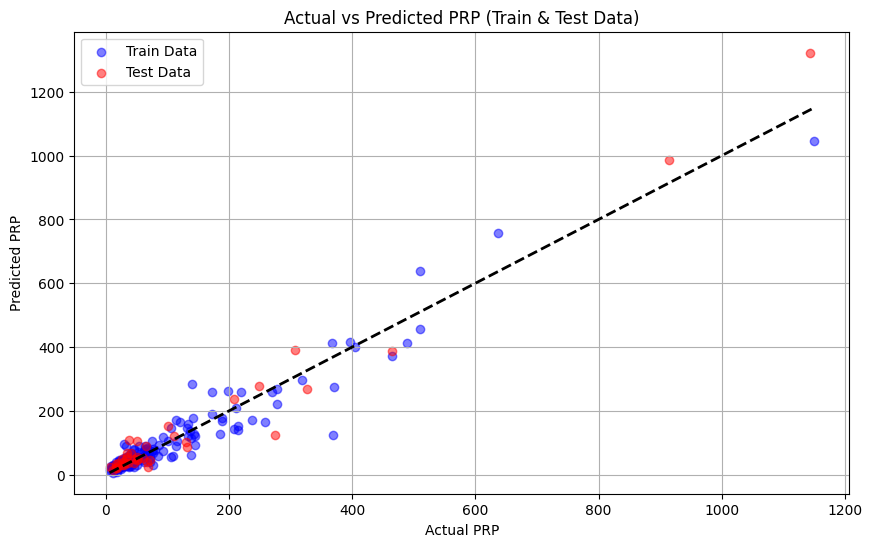

In [121]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5, label='Train Data')
plt.scatter(y_test, y_pred_test, color='red', alpha=0.5, label='Test Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs Predicted PRP (Train & Test Data)')
plt.legend()
plt.grid(True)
plt.show()

In [122]:
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print('학습 데이터 성능 평가')
print(mse_train)
print(mae_train)
print(r2_train)

학습 데이터 성능 평가
1529.020470551296
23.23225578463937
0.9204648044109383


In [123]:
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("테스트 데이터 성능 평가")
print(mse_test)
print(mae_test)
print(r2_test)

테스트 데이터 성능 평가
2370.096374775809
31.406218675535463
0.9534424890368548


In [124]:
cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

In [126]:
print(f'교차 검증 점수: {cv_score}')

교차 검증 점수: [0.85060539 0.75851864 0.80002955 0.89072312 0.9400806 ]
